In [301]:
%run carbon_tracker.py

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### Data

In [303]:
update_project_name("Pre-processing")

[codecarbon ERROR @ 11:34:23] You first need to start the tracker.


In [304]:
df = pd.read_csv("final_depression_dataset_1.csv")

In [305]:
df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


In [306]:
print(len(df))

2556


In [307]:
empty_rows = df.isnull().all(axis=1).sum()
print (empty_rows)

0


In [308]:
numeric_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
                   'Job Satisfaction', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']

# Vérifier les valeurs négatives uniquement dans les colonnes numériques
negative_rows = (df[numeric_columns] < 0).any(axis=1).sum()

print(negative_rows)


0


In [309]:
print(df.dtypes)

Name                                      object
Gender                                    object
Age                                        int64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                           int64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                object
dtype: object


In [310]:
print(df.isna().sum())


Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                                673
Academic Pressure                        2054
Work Pressure                             502
CGPA                                     2054
Study Satisfaction                       2054
Job Satisfaction                          502
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64


In [311]:
print(df['Gender'].unique())


['Female' 'Male']


In [312]:
print(df['Age'].unique())


[37 60 42 44 48 30 56 35 21 57 54 51 18 31 28 58 47 50 46 38 25 45 23 53
 19 34 49 20 43 22 33 36 24 41 29 27 52 26 59 55 40 32 39]


In [313]:
print(df['Financial Stress'].unique())


[2 4 5 3 1]


In [314]:
print(df['Work/Study Hours'].unique())


[ 6  0  1 12  3 11 10  8  7  9  5  2  4]


In [315]:
print(df['Degree'].unique())


['MA' 'B.Com' 'M.Com' 'MD' 'BE' 'MCA' 'BA' 'LLM' 'BCA' 'Class 12' 'B.Ed'
 'M.Tech' 'LLB' 'B.Arch' 'ME' 'MBA' 'M.Pharm' 'MBBS' 'PhD' 'BSc' 'MSc'
 'MHM' 'BBA' 'BHM' 'B.Tech' 'M.Ed' 'B.Pharm']


In [316]:
print(df['Dietary Habits'].unique())


['Moderate' 'Unhealthy' 'Healthy']


In [317]:
print(df['Depression'].unique())


['No' 'Yes']


In [318]:
print(df['Family History of Mental Illness'].unique())

['No' 'Yes']


In [319]:
print(df['Sleep Duration'].unique())

['7-8 hours' '5-6 hours' 'More than 8 hours' 'Less than 5 hours']


In [320]:
print(df['Working Professional or Student'].unique())	

['Working Professional' 'Student']


In [321]:
#Cumulative Grade Point Average(CGPA)
print(df['CGPA'].min())	
print(df['CGPA'].max())	

# Compter les valeurs de CGPA < 5
count_less_than_5 = (df['CGPA'] < 5).sum()
print(f"Nombre de CGPA < 5 : {count_less_than_5}")

# Compter les valeurs de CGPA > 5
count_greater_than_5 = (df['CGPA'] > 5).sum()
print(f"Nombre de CGPA > 5 : {count_greater_than_5}")

5.03
10.0
Nombre de CGPA < 5 : 0
Nombre de CGPA > 5 : 502


In [322]:
df['CGPA'].fillna(df['CGPA'].median(), inplace=True)

In [323]:
# Dictionnaire de conversion des valeurs textuelles en nombres
sleep_mapping = {
    'More than 8 hours': 9,  
    '5-6 hours': 5.5,        
    'Less than 5 hours': 4, 
    '7-8 hours': 7.5,        
    '6-7 hours': 6.5         
}

# Remplacement des valeurs dans la colonne Sleep Duration
df['Sleep Duration'] = df['Sleep Duration'].map(sleep_mapping)

# Vérification des valeurs uniques après conversion
print(df['Sleep Duration'].unique())


[7.5 5.5 9.  4. ]


In [324]:
df['Profession'].fillna('None', inplace=True)

In [325]:
print(df['Academic Pressure'].unique())	

[nan  2.  4.  1.  5.  3.]


In [326]:
print(df['Work Pressure'].unique())	

[ 2.  4.  3.  1. nan  5.]


In [327]:
df['Academic Pressure'].fillna(df['Academic Pressure'].median(), inplace=True)

In [328]:
df['Work Pressure'].fillna(df['Work Pressure'].median(), inplace=True)

In [329]:
print(df['Study Satisfaction'].unique())	

[nan  4.  5.  3.  2.  1.]


In [330]:
print(df['Job Satisfaction'].unique())	

[ 4.  3.  5.  2.  1. nan]


In [331]:
# Séparer les données en deux groupes : "Yes" et "No" dans la colonne 'Depression'
depression_yes = df[df['Depression'] == 'Yes']
depression_no = df[df['Depression'] == 'No']

# Calculer la médiane pour chaque groupe pour les colonnes concernées
medians_yes = depression_yes[['Job Satisfaction', 'Study Satisfaction', 'Work Pressure', 'Academic Pressure']].median()
medians_no = depression_no[['Job Satisfaction', 'Study Satisfaction', 'Work Pressure', 'Academic Pressure']].median()

# Imputer les valeurs manquantes dans le DataFrame original
for col in ['Job Satisfaction', 'Study Satisfaction', 'Work Pressure', 'Academic Pressure']:
    # Imputer pour le groupe "Yes"
    df.loc[(df['Depression'] == 'Yes') & (df[col].isnull()), col] = medians_yes[col]
    
    # Imputer pour le groupe "No"
    df.loc[(df['Depression'] == 'No') & (df[col].isnull()), col] = medians_no[col]


In [332]:
print(df.isna().sum())

Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [333]:
# Initialisation du standardiseur
scaler = StandardScaler()

# Sélection des colonnes à standardiser
columns_to_standardize = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
                          'Job Satisfaction','Study Satisfaction', 'Work/Study Hours', 'Financial Stress']

# Application de la standardisation
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

In [334]:
le = LabelEncoder()

# Encodage des variables catégorielles
df['Gender'] = le.fit_transform(df['Gender'])
df['City'] = le.fit_transform(df['City'])
df['Working Professional or Student'] = le.fit_transform(df['Working Professional or Student'])
df['Profession'] = le.fit_transform(df['Profession'])
df['Degree'] = le.fit_transform(df['Degree'])
df['Have you ever had suicidal thoughts ?'] = le.fit_transform(df['Have you ever had suicidal thoughts ?'])
df['Dietary Habits'] = le.fit_transform(df['Dietary Habits'])
df['Family History of Mental Illness'] = le.fit_transform(df['Family History of Mental Illness'])
df['Depression'] = le.fit_transform(df['Depression'])

In [335]:
stop_tracker()

### Exploration statistique et visualisation des données :


In [336]:
# Statistiques descriptives
print(df.describe())

            Gender           Age         City  \
count  2556.000000  2.556000e+03  2556.000000   
mean      0.521518  3.822364e-17    14.785994   
std       0.499635  1.000196e+00     8.636607   
min       0.000000 -1.716650e+00     0.000000   
25%       0.000000 -9.008695e-01     8.000000   
50%       1.000000 -3.510793e-03    15.000000   
75%       1.000000  8.938479e-01    22.000000   
max       1.000000  1.709629e+00    29.000000   

       Working Professional or Student   Profession  Academic Pressure  \
count                      2556.000000  2556.000000       2.556000e+03   
mean                          0.803599    19.983959      -1.521996e-16   
std                           0.397353    10.198276       1.000196e+00   
min                           0.000000     0.000000      -3.251195e+00   
25%                           1.000000    11.000000      -1.271488e-03   
50%                           1.000000    25.000000      -1.271488e-03   
75%                           1.000000  

In [337]:
df = df.drop('Name', axis=1)


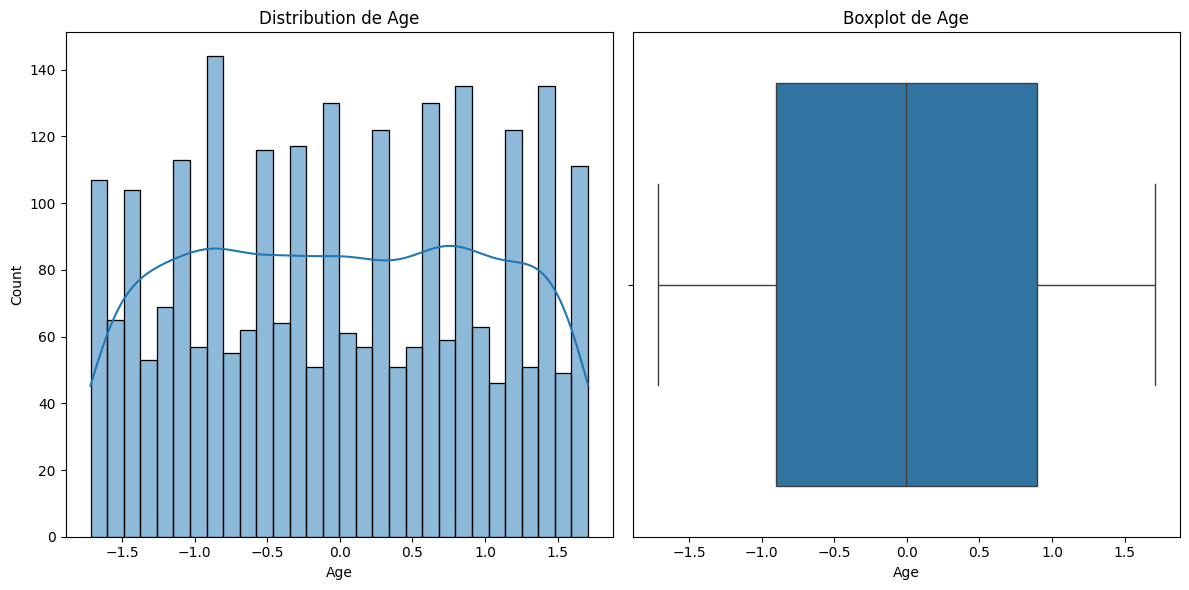

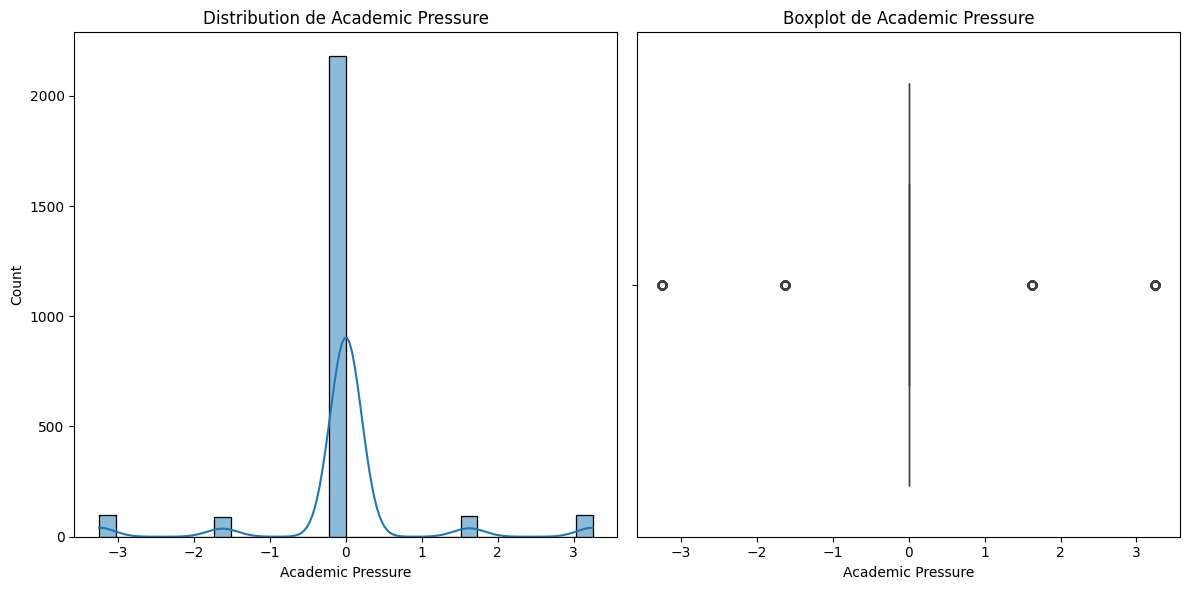

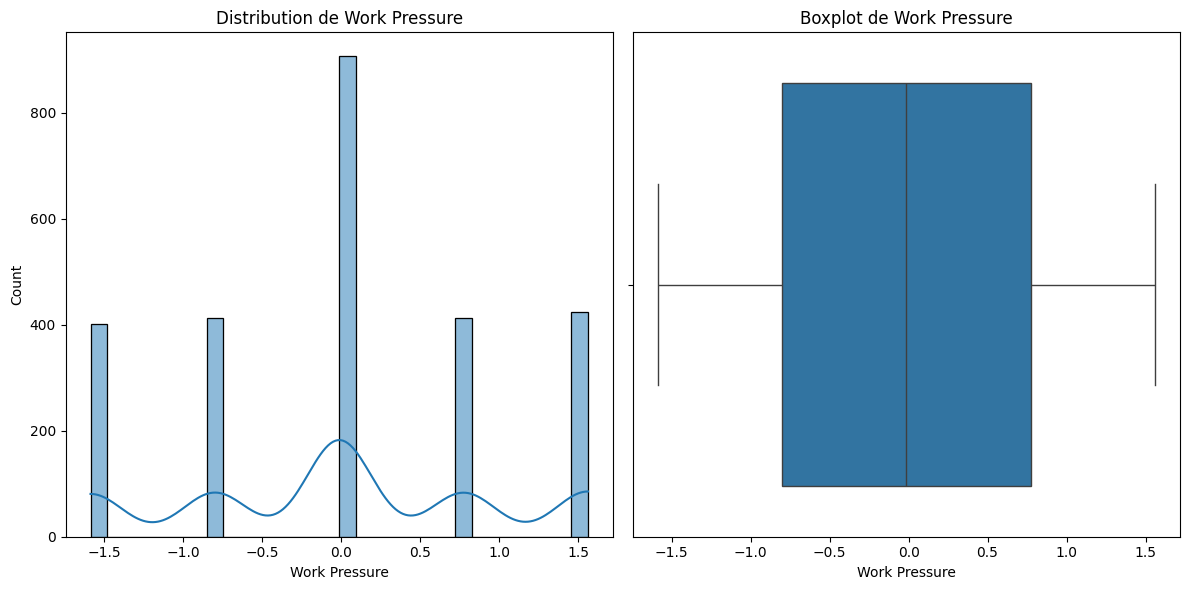

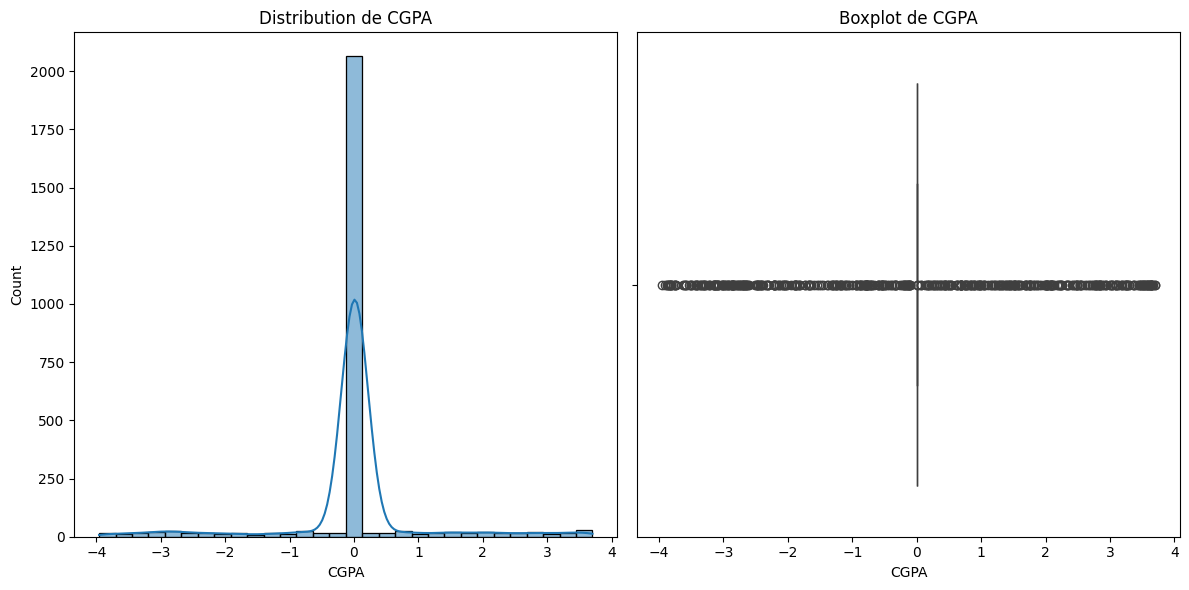

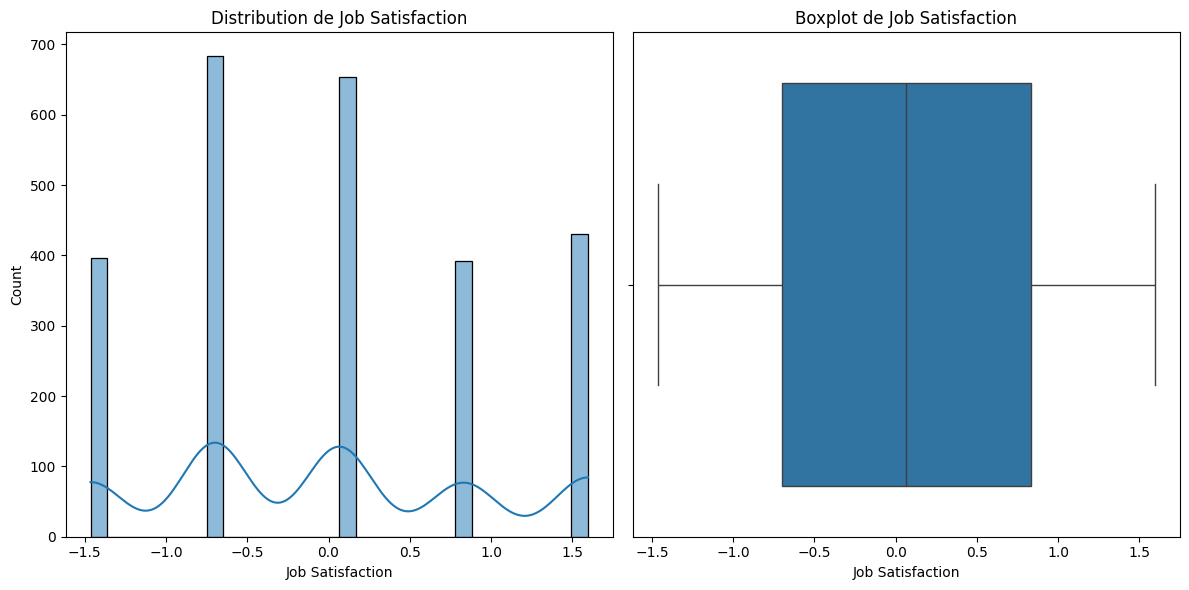

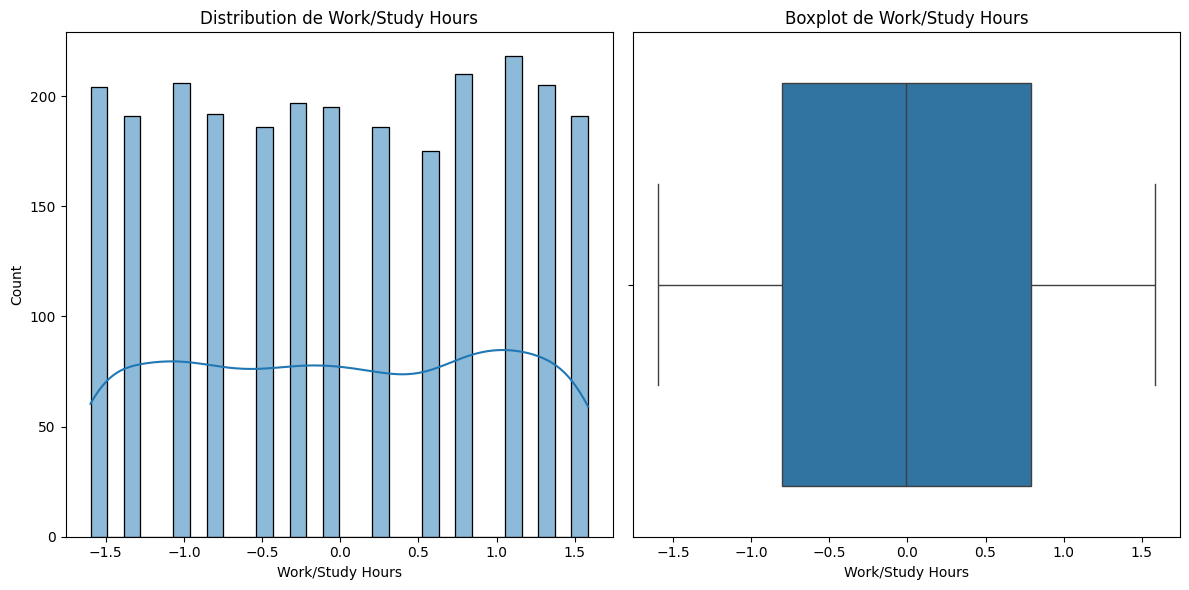

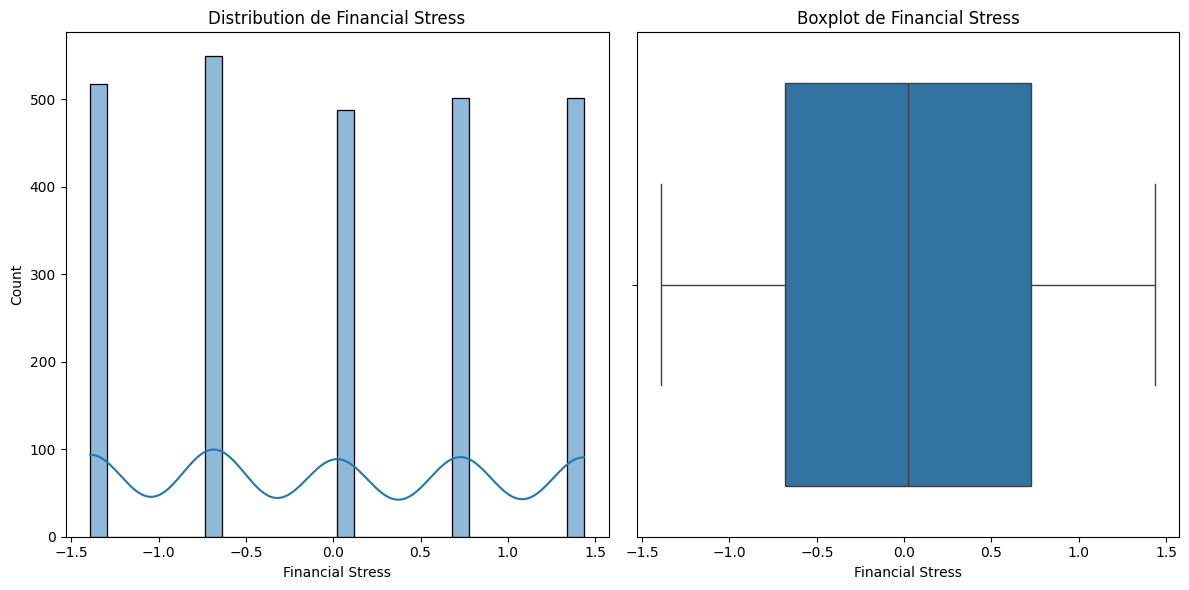

In [338]:
# Visualisation des distributions des variables numériques
numeric_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
                   'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

for col in numeric_columns:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution de {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    
    plt.tight_layout()
    plt.show()



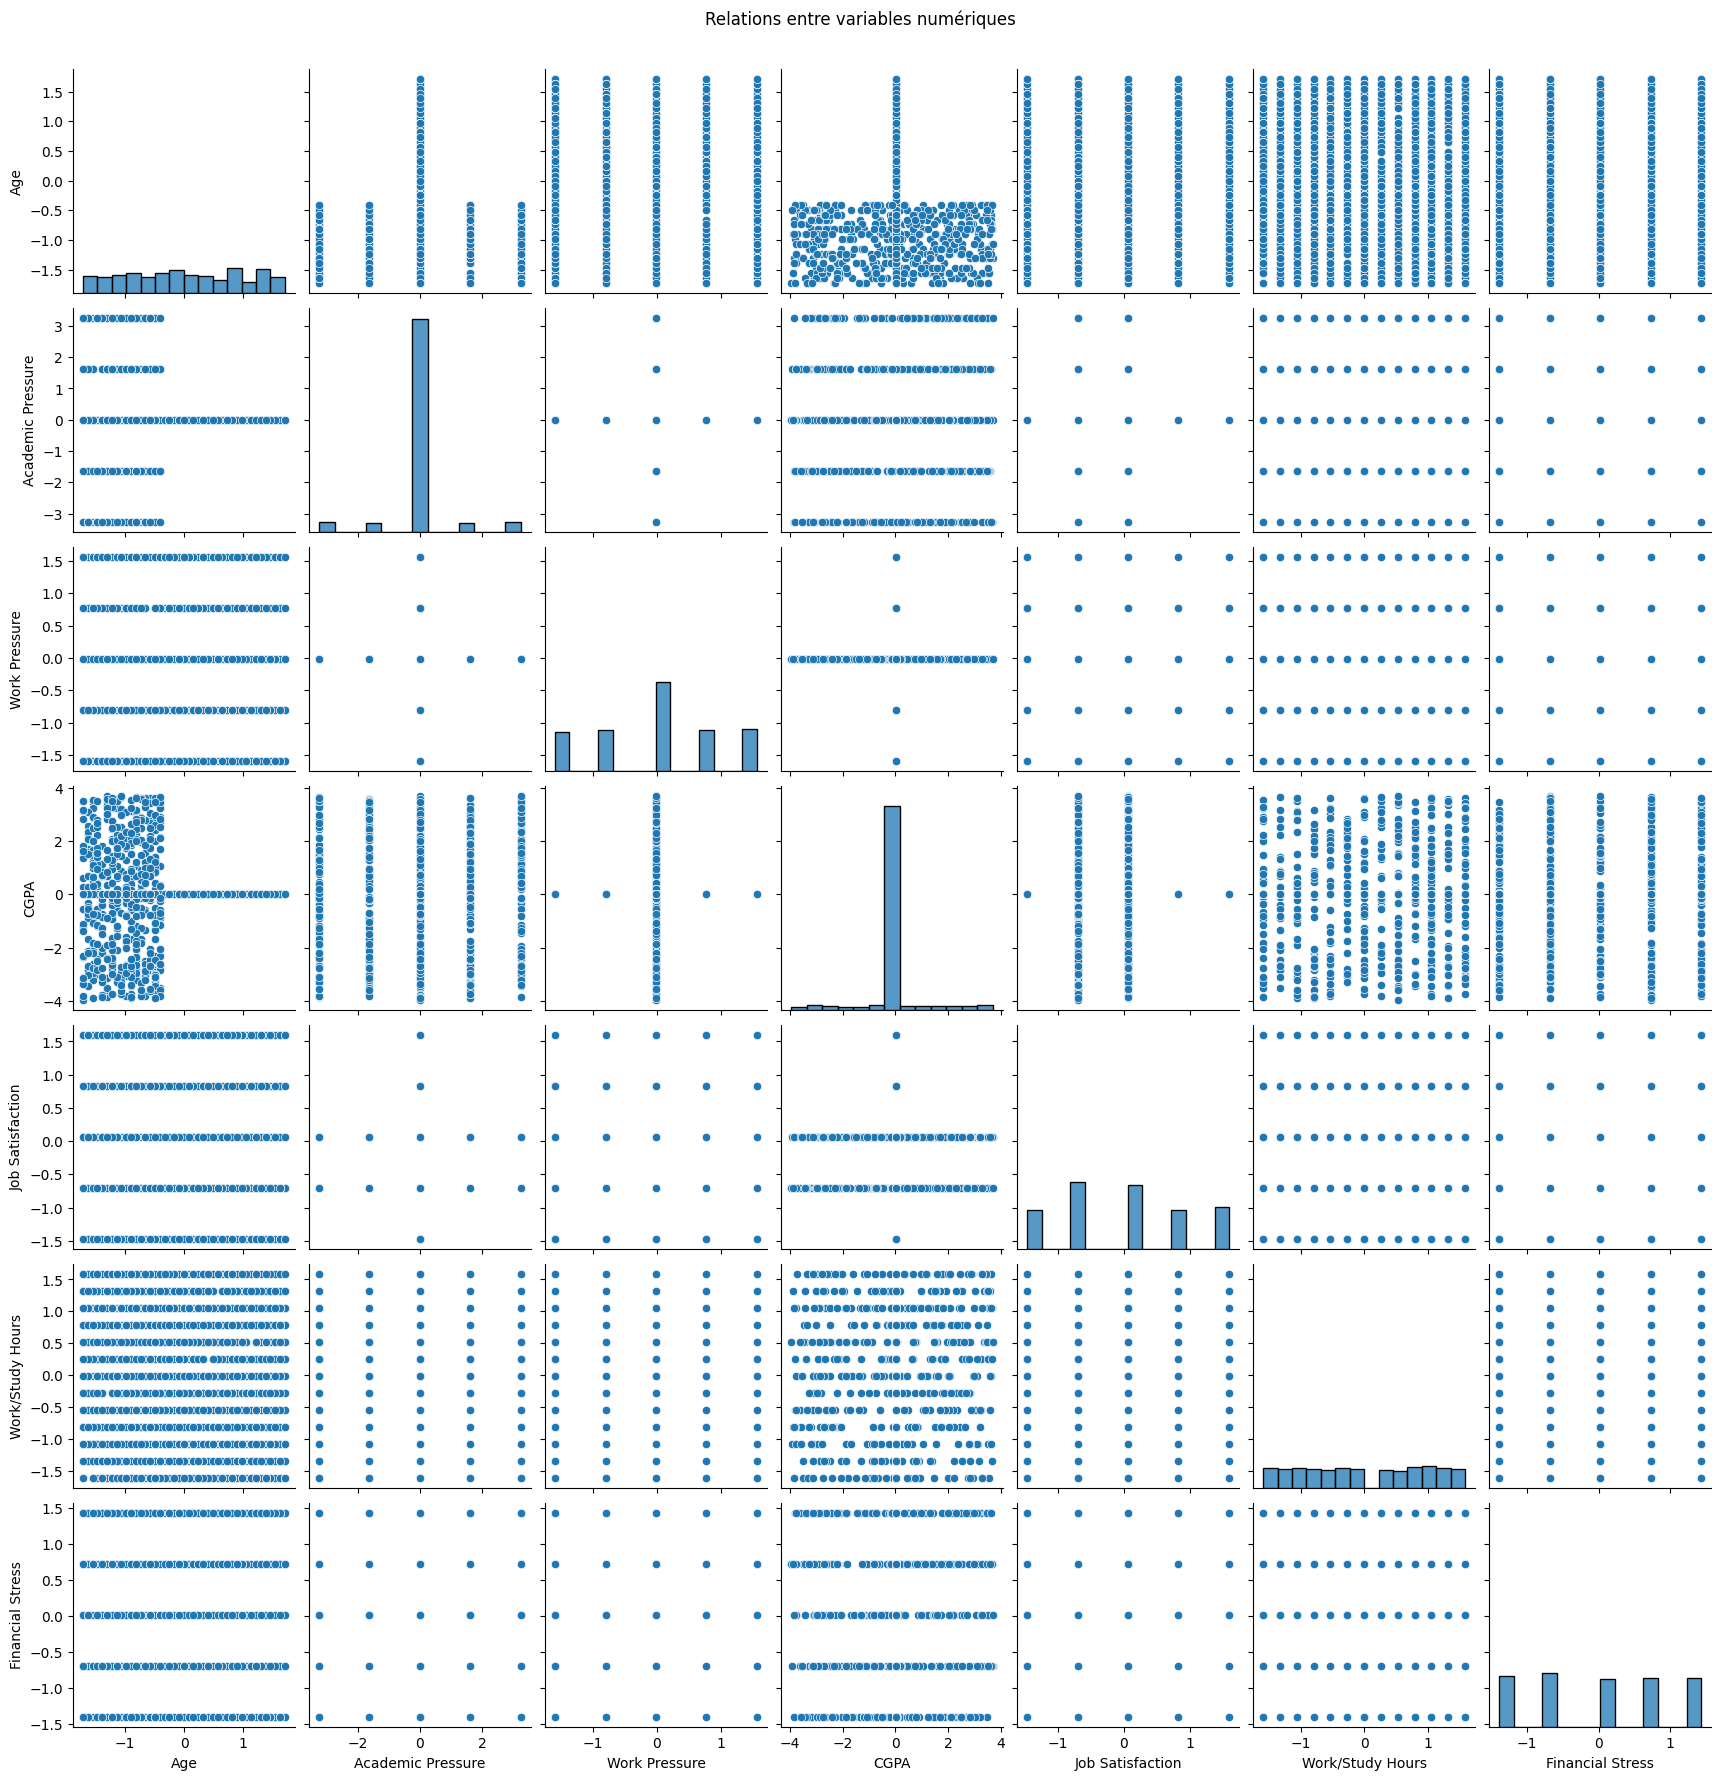

In [339]:
# Scatter plots pour les relations entre variables
sns.pairplot(df[numeric_columns])
plt.suptitle('Relations entre variables numériques', y=1.02)
plt.show()

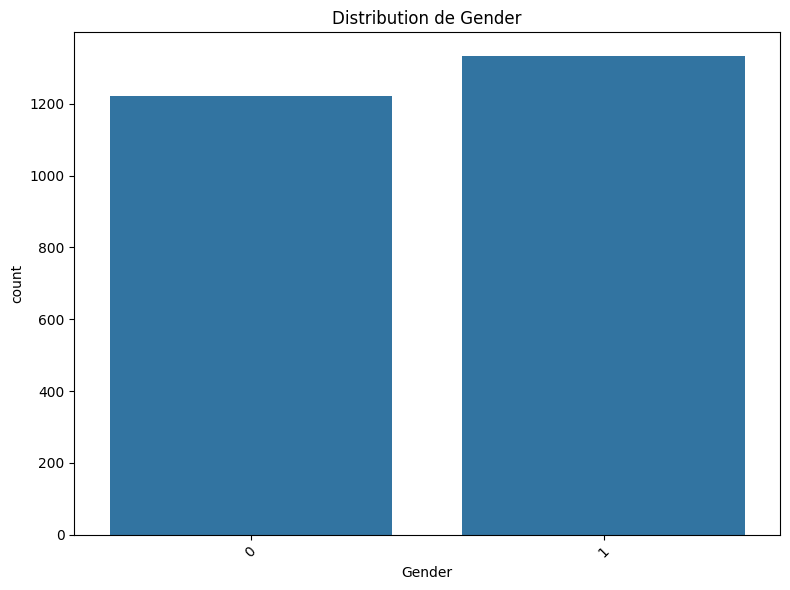

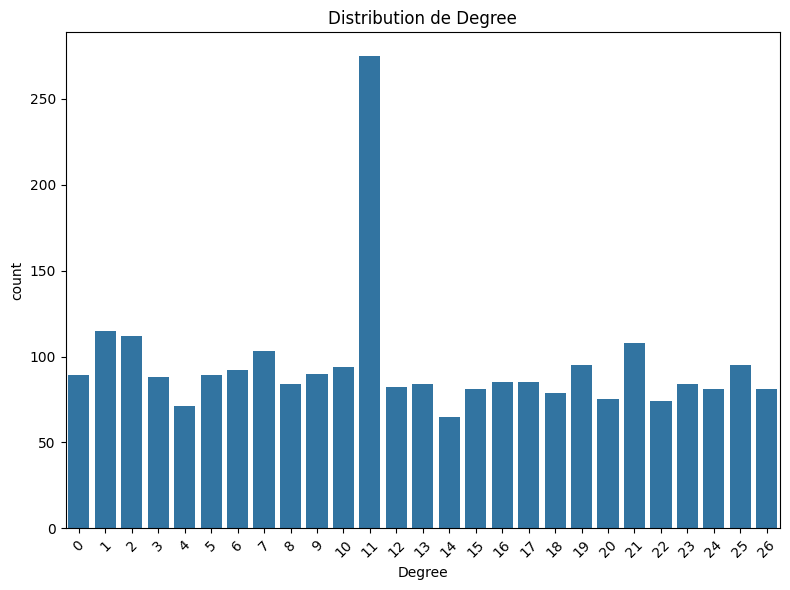

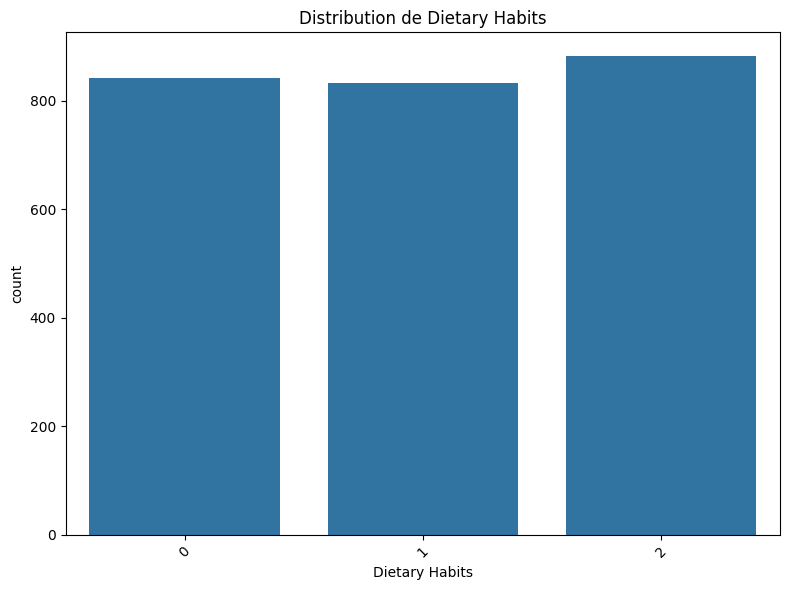

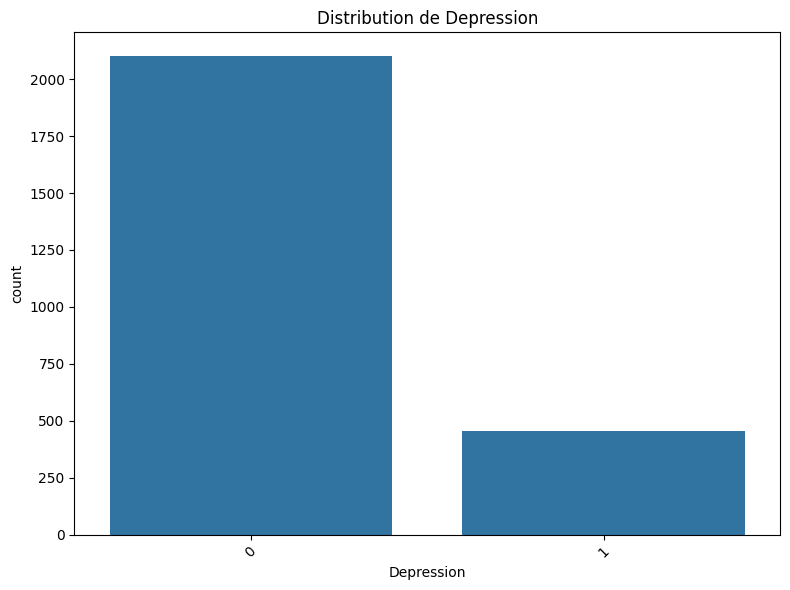

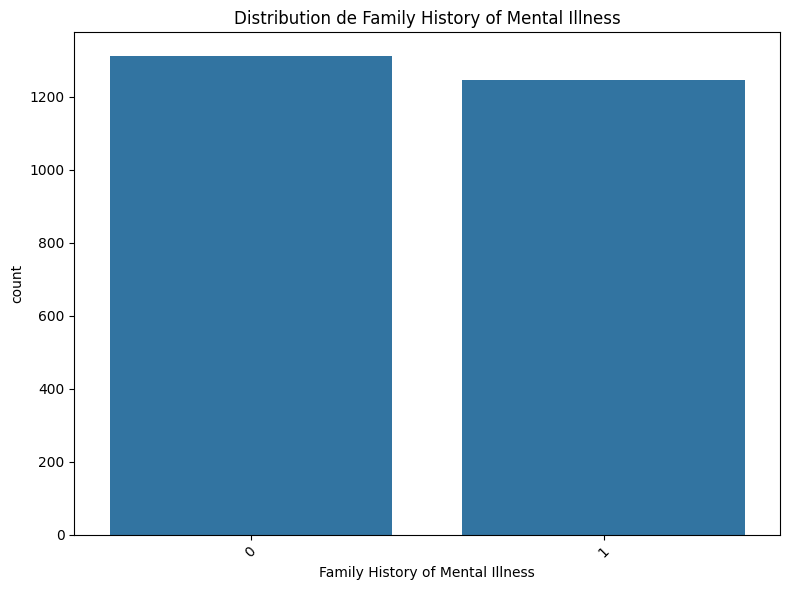

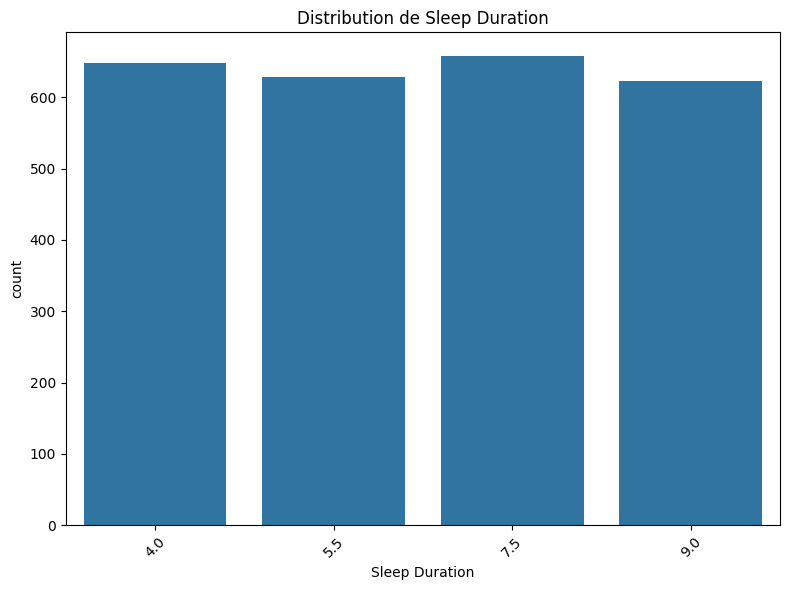

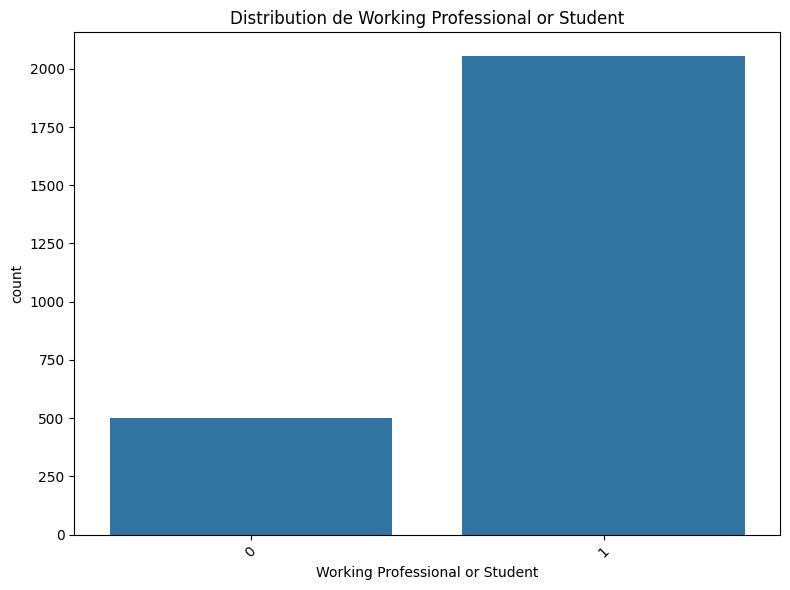

In [340]:
# Analyse des variables catégorielles
categorical_columns = ['Gender', 'Degree', 'Dietary Habits', 'Depression', 
                       'Family History of Mental Illness', 'Sleep Duration', 
                       'Working Professional or Student']

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[col])
    plt.title(f'Distribution de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

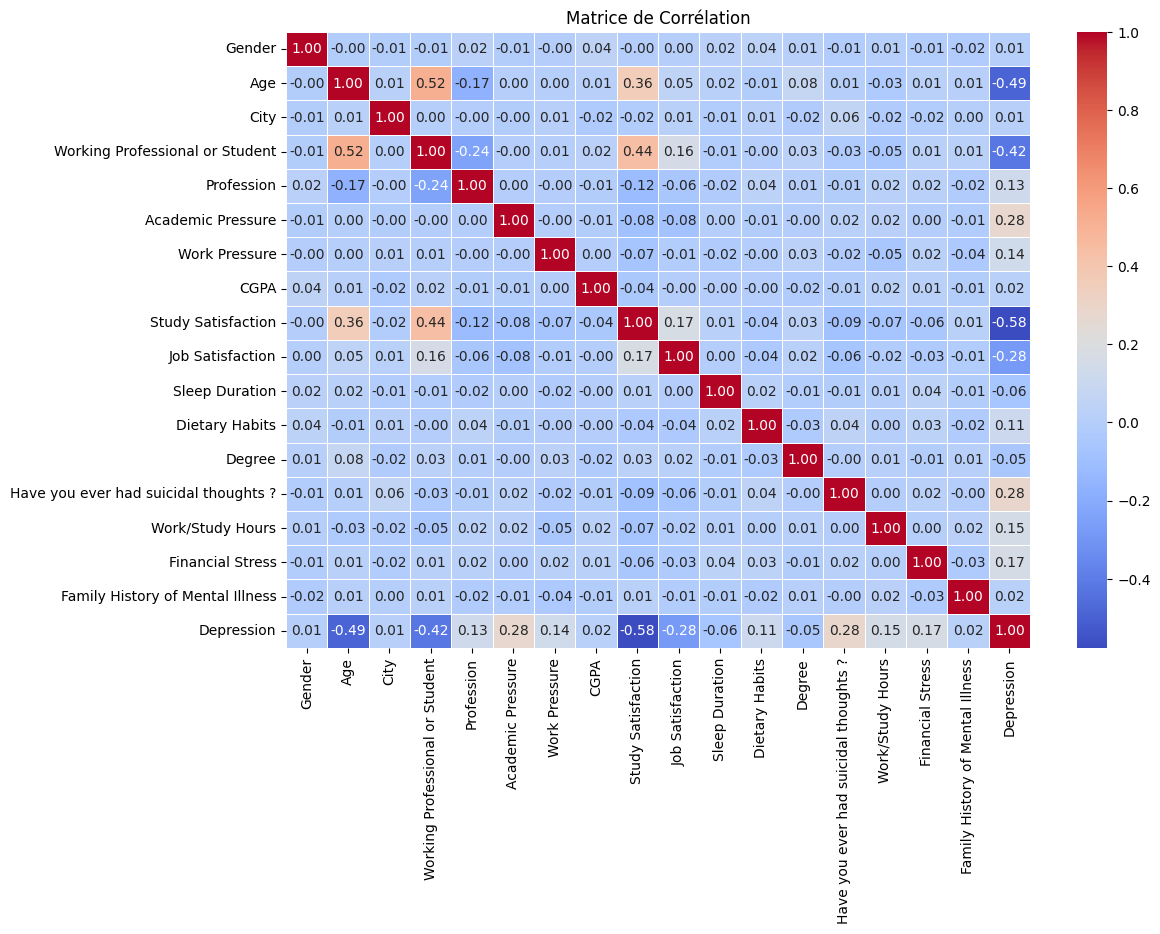

In [341]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()
